# HEART DISEASE PREDICTION PROJECT:

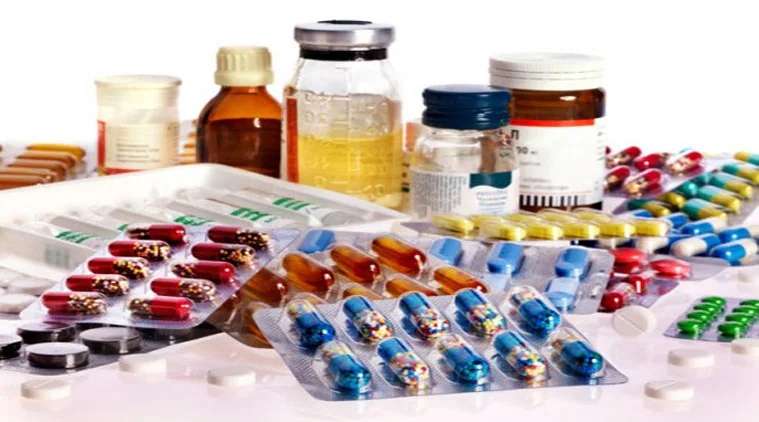

In [181]:
from IPython.display import Image, display

display(Image(filename='headerImage.png'))


Import the dependencies:

In [182]:
import numpy as np
import pandas as pd

#for ignoring all warnings (if any) use the below dependency:
import warnings
warnings.filterwarnings("ignore")

Data Collection and Preprocessing:

In [183]:
heart_data = pd.read_csv("heart_disease_data.csv")

In [184]:
#Print first 5 rows of the dataset:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [185]:
#Print last 5 rows of the dataset:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [186]:
#Check the dataset-size:
heart_data.shape

(303, 14)

In [187]:
#Getting some basic information about the dataset:
print("Data's concise summary:")
heart_data.info()

print("\n\n\n\n Statistical summary : ")
heart_data.describe()

Data's concise summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB




 Statistical summary : 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [188]:
#Check for any missing values in the data for each column:
heart_data.isnull().sum().reset_index(name="No. of missing values")

,index,No. of missing values
0,age,0
1,sex,0
2,cp,0
3,trestbps,0
4,chol,0
5,fbs,0
6,restecg,0
7,thalach,0
8,exang,0
9,oldpeak,0


In [189]:
# Count duplicate values per column
duplicate_counts = heart_data.apply(lambda x: x.duplicated().sum()).reset_index()
duplicate_counts.columns = ["Column", "No. of duplicate values"]
duplicate_counts

,Column,No. of duplicate values
0,age,262
1,sex,301
2,cp,299
3,trestbps,254
4,chol,151
5,fbs,301
6,restecg,300
7,thalach,212
8,exang,301
9,oldpeak,263


In [190]:
#No. of row-level duplicate-values:
heart_data.duplicated().sum()

np.int64(1)

,target,(1) Have heart_disease (0) Dont have heart disease
0,1,165
1,0,138


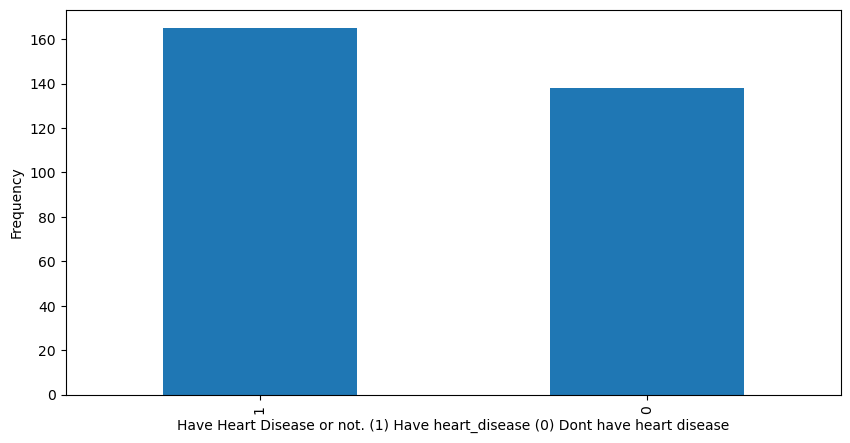

In [191]:
#Check how many people have heart-disease and how many don't:
plt.figure(figsize=(10,5))
heart_data["target"].value_counts().plot(kind="bar")
plt.xlabel("Have Heart Disease or not. (1) Have heart_disease (0) Dont have heart disease")
plt.ylabel("Frequency")

heart_data["target"].value_counts().reset_index(name="(1) Have heart_disease (0) Dont have heart disease")

Machine-learning part (whether a person will have a heart disease or not):

In [192]:
#Import required ML dependencies:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [193]:
#Splitting the data into training and testing data (in the ratio of 80%-20% respectively):
X = heart_data.drop(columns="target",axis=1)
Y = heart_data["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [194]:
#Creating a logistic-regression model and fitting the training data into it:
model = LogisticRegression()
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [195]:
#Perform model-evaluation:

#Accuracy on training-data:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training-data : ",training_data_accuracy*100,"%")


#Accuracy on testing-data:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on testing-data : ",test_data_accuracy*100,"%")

Accuracy on training-data :  85.12396694214877 %
Accuracy on testing-data :  81.9672131147541 %


In [196]:
#CONCLUSION AT THIS PART: Our model is not overfitted becuase there is very less gap between the accuracy scores of both training and testing data

In [197]:
#Building a predictive system for one person:
input_data = (41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)

#change the input-data to a numpy array and reshape the resultant array since we are predicting for only one instance:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction) #If prediction is 1 then that means that the person will have heart-disease. If 0 then he/she will not have heart disease

if prediction[0] == 0:
    print("The Person does not have / will not have Heart Disease")
else:
    print("The Person has or will have Heart Disease")

[1]
The Person has or will have Heart Disease


In [198]:
#Building a predictive system for second person:
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

#change the input-data to a numpy array and reshape the resultant array since we are predicting for only one instance:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction) #If prediction is 1 then that means that the person will have heart-disease. If 0 then he/she will not have heart disease

if prediction[0] == 0:
    print("The Person does not have / will not have Heart Disease")
else:
    print("The Person has or will have Heart Disease")

[0]
The Person does not have / will not have Heart Disease
